<a href="https://colab.research.google.com/github/anammagalhaes/Data-Science-Projects-/blob/master/An%C3%A1lise_da_viol%C3%AAncia_do_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Análise da violência no Rio de Janeiro 

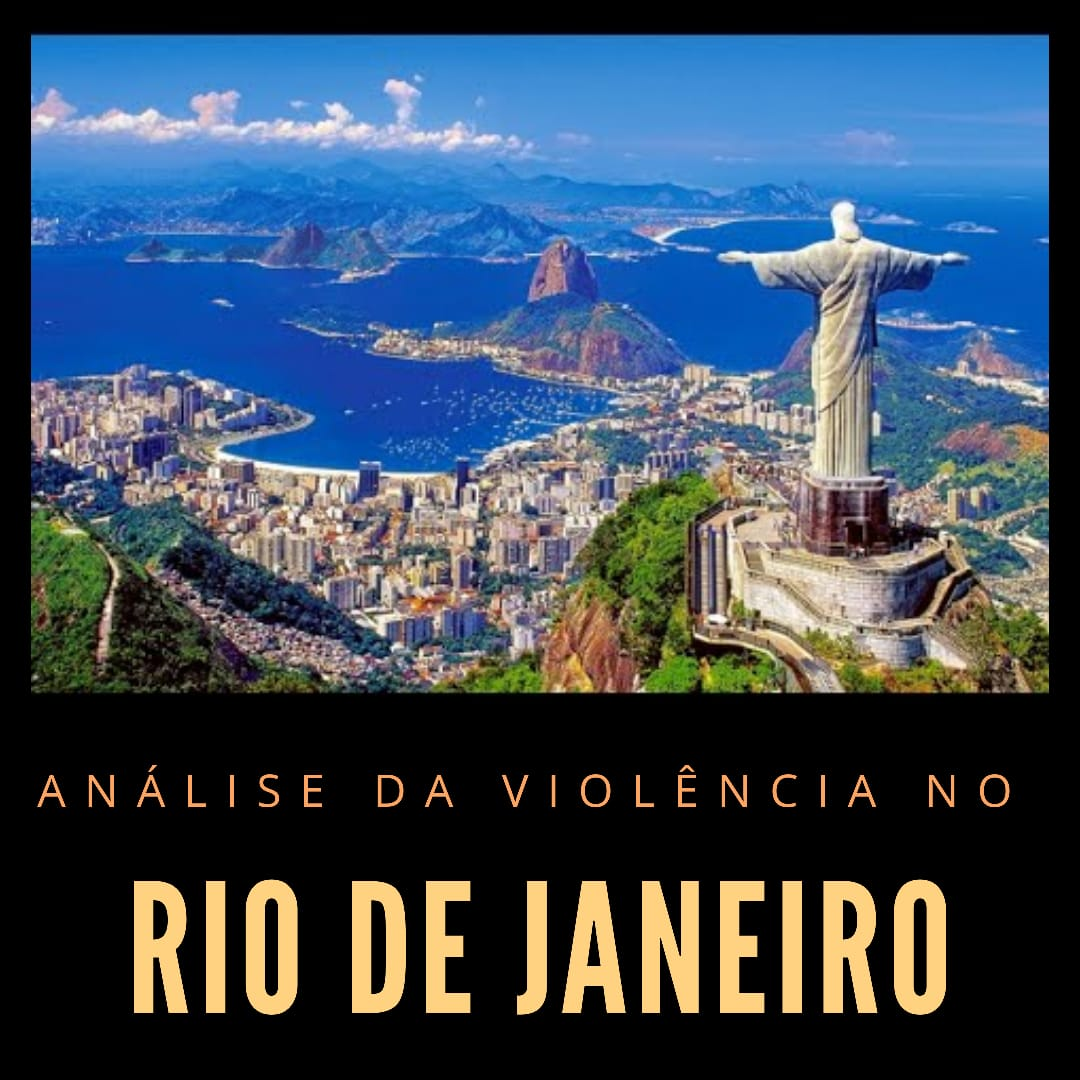

## Contextualização

O portal [ISPDados](http://www.ispdados.rj.gov.br/) é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro. Nesta, pode ser acessados as bases de dados de registros criminais e de atividade policial do estado. As estatísticas divulgadas são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM). Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência. Nesta página, todos os dados publicados estão de acordo com a Lei de Acesso à Informação, objetivando maior transparência no que diz respeito às estatísticas de criminalidade e atividade policial do estado.

No projeto será realizada uma análise dos indicadores estatísticos da violência no Rio, explorando algumas das variáveis fornecidas. Serão utilizadas bibliotecas do Python, como Pandas e Numpy, as quais nos permite extrair informações e interpretações úteis a partir dos dados e criar gráficos para garantir uma melhor vizualização e entendimento das informações.

Este é um projeto que desenvolvi no Curso da Sigmoidal, com o professor Carlos Melo e teve como objetivo pessoal de treinamento destas duas bibliotecas citadas, bem como analisar meu aprendizado no curso. 

## Obtenção dos dados 


O dataset a ser utilizado foi retirado do site comentado anteriormente, mas o arquivo csv pode ser baixado diretamente neste [link](https://https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv).



## Análise Exploratória 

Importando os dados e os pacotes necessários para a análise. 

In [2]:
# Importando os pacotes 

import pandas as pd
import numpy as np



Importando os dados e criação do DataFrame (df)

In [4]:
# Imporando o dataset e criando um DataFrame. 

df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')



Verificação da dimensão do DataFrame e tipo dos dados. 

In [ ]:
# dimensão do dataframe em números de variáveis (colunas) e entradas (linhas)

print ("Variáveis:", df.shape[0])
print("Entradas:", df.shape[1])

Variáveis: 344
Entradas: 56


Verificação de quais variáveis (ou features) estão presentes no dataset.

In [ ]:
# verificação de quais são as variáveis 

df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Pra definir o que deve ser realizado no dataset nas próximas etapas, deve-se, primeiramente conhecer quais os tipos de dados que estamos trabalhando. Até agora, imaginamos que as variáveis são numéricas, portanto, vamos avaliar se elas são do tipo float ou int. É bom verificar a existência de strings, para que possam ser eliminadas na etapa de limpeza. 

In [ ]:
# verificação do tipo de dados (int ou float), que é importante para promover a limpeza do dataset, se necessário. 

df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Sim, confirmamos que as variáveis são numéricas e que são do tipo int ou float. 

Analisar o dataset completo seria excelente, mas podemos analisar somente as primeiras entradas para ter uma noção de como os dados estão distribuidos, se existe dados auxentes, se existe algum erro e assim, podemos ter a possibilidade de explicar, reparar ou eliminar o que for necessário. Desta forma, iremos avaliar as cinco primeiras entradas do dataset. 

In [ ]:
# análise de como os dados estão organizados 

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


É interessante reaparar que algumas variáveis apresentam muitos dados ausentes, indicados por NaN. Dado o grande intervalo de tempo apresentado no dataset, podemos sugerir algumas hipóteses do que poderia explicar essa ausência, e como podemos contorná-la para continuar explorando o conjunto de dados.

    



Como temos dados registrados desde o ano de 1991, alguns desses crimes poderiam não estar sendo contabilizados pelo órgão que coletou esses dados e gerou esse dataset. Estarem ausentes não significa que não existiram, e vamos pensar em formas de lidar com essa ausência logo mais. 
Este dataset contem dados que foram registrados desde o ano de 1991. Alguns dos valores ausentes pode ter sido resultado da não contabilização destes crimes, ou que eles realmnente não existiram. No entanto, nada podemos afirmar, pois a iniciativa de gerar os dados é recente e isso gera dúvida se antigamente havia a preocupação com o preenchimento e gerenciamento destes dados. Ou seja, a ausência de alguns dados pode vir da cultura voltada a dados não ser tão eficaz no Brasil até os dias de hoje. 

    

Portanto, é racional verificar qual a proporção destes dados ausentes em relação ao banco de dados.

In [ ]:
# análise da proporção dos dados ausentes no DataFrame.

(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Acima, podemos ver que algumas das variáveis tem valores ausentes em proporções consideráveis (mais de 50% dos dados das variáveis são ausentes), por exemplo: crimes relacionados a bicicletas e apreensão de drogas. 

Mais adiante esta questão será avaliada mais detalhadamente. 



## Algumas informações Estatísticas da Violência no Rio de Janeiro

Usando o método describe() podemos visualizar a distribuição estatística do dataframe. A partir disso, é possivel identificar outliers, entender melhor a distribuição dos dados identificando falhas nesta distribuição, permitindo a condução das etapas de tratamento e limpeza dos dados. 


In [ ]:
# imprimir resultado estatístico do DataFrame 

df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Este projeto tem finalidade de aplicar algumas das bibliotecas do Python e ser bastante sucinto. Este banco de dados abre um leque de oportunidades de estudos das diferentes variáveis que ele traz. 

No entanto, irei investigar mais profundamente os crimes de roubo e furto de veículos, que é um problema em destaque na criminalidade brasileira. As informações obtidas pode agregar na tomada de decisão para o combate desse tipo de crime. 
É importante notar também que as variáveis que envolvem crimes com veículos, que são roubo_veiculo, furto_veiculos, recuperação_veiculos não possuem valores ausentes. 

Mais adiante também serão analisadas as ocorrências contra a vida. A variável estudada é a hom_doloso, que também não apresenta valores ausentes e que são casos importantes e bastante recorrentes no crime no Brasil. 


## Crime contra o Patrimônio - Veículos 

In [ ]:
# ver a média da variável roubo_veiculo

mean_roubo_veiculo = df.roubo_veiculo.mean()
print(round(mean_roubo_veiculo,2))

2448.7


In [ ]:
# ver a média da variável furto_veiculos 

mean_furto_veiculos = df.furto_veiculos.mean()
print(round(mean_furto_veiculos,2))

1674.67


In [ ]:
# ver a média de recuperacao_veiculos 

mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
print(round(mean_recuperacao_veiculos,2))

1772.24


In [ ]:
# média de veículos perdidos
media_total = mean_roubo_veiculo + mean_furto_veiculos
print('Média de veículos Perdidos por mês: {:.2f} '.format(media_total))
print('Veículos recuperados por mês: {:.2f}'.format(mean_recuperacao_veiculos))

# porcentagem de veículos recuperados
por_veiculos_recuperados = mean_recuperacao_veiculos/media_total*100

print('{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(por_veiculos_recuperados))

Média de veículos Perdidos por mês: 4123.37 
Veículos recuperados por mês: 1772.24
42.98% dos veículos roubados ou furtados são recuperados.


## Cimes contra a vida 

Abaixo, vamos identificar qual foi o máximo e mínimo registrado para a variável hom_doloso ao longo do período observado no dataset.

In [ ]:
# valores max e min de hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# imprimir os valores máximos e mínimos
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	831


Acima podemos ver que no mês com menor número de casos foram registrados 272 homicídios dolosos.

Em relação ao mês com números mais elevado, houveram 831 homicídios dolosos.

Vamos investigar um pouco mais a fundo essas entradas.


In [ ]:
# verificando o mês com menor número de homicídios dolosos

df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [ ]:
# verficando o mês ccom maior número de homicídios dolosos 

df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Acima, vemos que o mês de Janeiro de 1995 foi o mês com mais casos de homicídios dollosos registrados no nosso dataset, enquanto o posto de mês com menor número de casos foi Junho de 2015.

Isso sugere um bom sinal, indicando que, talvez, o crime venha diminuindo. Apenas uma análise mais aprofundada pode nos dizer.


## Visualização dos dados 

Histogramas são poderosas ferramentas de visualização, que nos auxiliam a entender a distribuição dos valores em uma variável.

Abaixo, faremos essa análise em relação à variável hom_doloso.


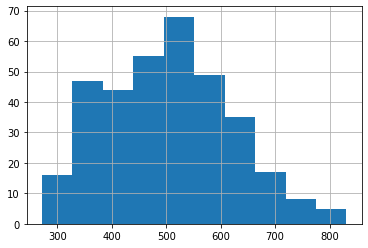

In [ ]:
# plotar histograma de hom_doloso
df.hom_doloso.hist();

No gráfico acima, alguns dados chamam a nossa atenção, como:

Aproximadamente 70 meses do período analisado  possuem de 500 a 550 ocorrências de homicídio doloso. Menos de 10 meses apresentam 700 a 850 homicídios. De 15 a 45 meses, aproximadamente, apresentam valores de ocorrência que vão de 350 a 600 homicidios. 


## Conclusão

Este projeto, como disse anteriormente, tinha como objetivo ser bastante sucinto, apesar de o banco de dados dar uma margem bastante grande para analisar diversas variáveis, obter muitas informações e abrir possibilidades para aplicar métodos e funções diversas do Python. No entanto, esta análise foi útil para observar que ainda existe valores faltantes no banco de dados, o que gera necessidade de dar atenção para cultura voltada a dados e ao seu gerenciamento. Foi possivel verificar que aproximadamente 42% dos veículos roubados e furtados são recuperados. Com relação à homicidio doloso foi possivel analisar a distribuição das ocorrências ao longo dos meses a partir de um histograma e verificar a frequência destes crimes. 

Sugestão para uma continuação deste trabalho é plotar diferentes gráficos para as variáveis a fim de extrair e refinar maiores informações aproveitando a dimensão e as oportunidades que ele oferece. Além disso, é possível investigar as possibilidades de criação de modelos preditivos. 


